# Twitter Sentiment Classification Predict 

© Explore AI Academy




### Team JM2 Members
- Nokukhanya Magagula
- Ofentse Maleka
- Rethabile Ntshabele
- Palesa Monau
- Modisaotsile Patrick Masilo
- Lethabo Kgathuke

---

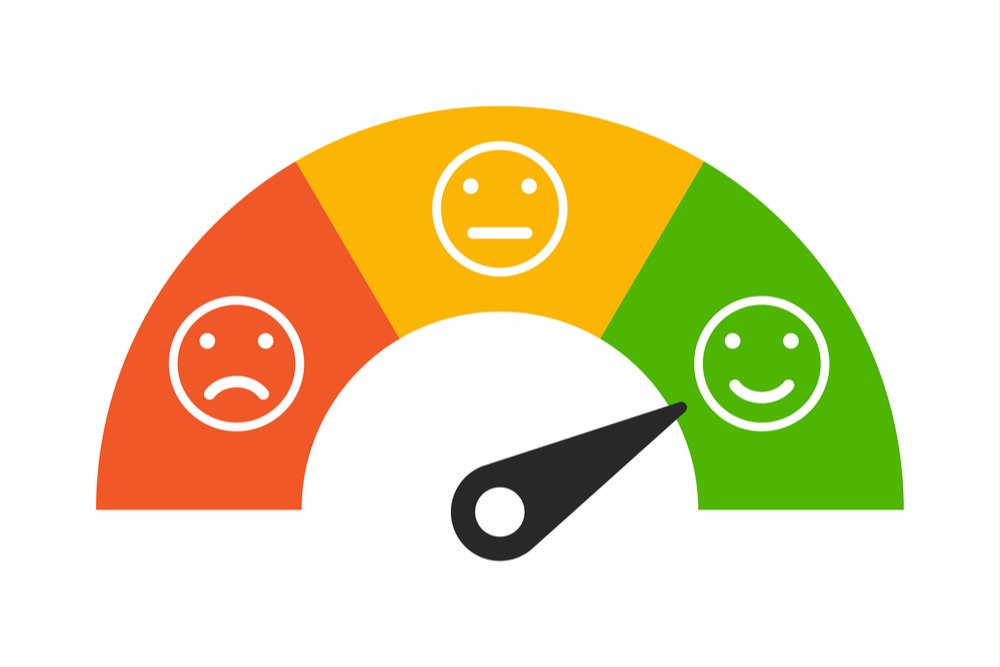

## Introduction

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. Brands can use this data to measure the success of their products in an objective manner.

For this project, climate change is the topic at hand. 

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

What's required for this project is to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

This project aims at providing an accurate and robust solution to this task, giving companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


### Dataset Description

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

#### Class Description
- 2  &rarr; **News**: the tweet links to factual news about climate change
- 1  &rarr; **Pro**: the tweet supports the belief of man-made climate change
- 0  &rarr; **Neutral**: the tweet neither supports nor refutes the belief of man-made climate change
- -1 &rarr; **Anti**: the tweet does not believe in man-made climate change

#### Features
- **sentiment** &rarr; which class a tweet belongs in (refer to Class Description above), target variable
- **message** &rarr; Tweet body
- **tweetid** &rarr; Twitter unique id

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

- <a href=#three.1>3.1 Target Variable Analysis</a>

- <a href=#three.2>3.2 Tweets Analysis</a>

<a href=#four>4. Data Preprocessing</a>

- <a href=#four.1>4.1 Text Cleaning</a>

- <a href=#four.2>4.2 Stopwords Removal</a>

- <a href=#four.3>4.3 Text Normalization</a>

- <a href=#four.4>4.4 Clean Data Analysis</a>

<a href=#five>5. Feature Engineering</a>

- <a href=#five.1>5.1 Vectorization</a>

- <a href=#five.2>5.2 Dealing with Class Imbalance</a>

<a href=#six>6. Data Modeling</a>

- <a href=#six.1>6.1 Training Models</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Submission</a>

- <a href=#eight.1>8.1 Cleaning Test Data</a>

- <a href=#eight.2>8.2 Model Submission</a>

<a href=#nine>9. Conclusion</a>

<a href=#ten>10. References</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    


In [61]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
#experiment = Experiment(
#    api_key="FRnbYP0b4bvjNJuQ2XMV2dhi6",
#    project_name="general",
#    workspace="classification-2207ftds-team-jm2",
#    log_code=True
#)


COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/classification-2207ftds-team-jm2/general/d7e592a665654768ac6ec424d6c6af73
COMET INFO:   Parameters:
COMET INFO:     copy         : True
COMET INFO:     norm         : l2
COMET INFO:     smooth_idf   : True
COMET INFO:     sublinear_tf : False
COMET INFO:     use_idf      : True
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (2.18 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COM

In [62]:
# import packages
import pandas as pd
import numpy as np
import math
from scipy.sparse import csr_matrix
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

import nltk.downloader
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from sklearn.utils import resample

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pydataset import data
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.svm             import SVC
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, accuracy_score, log_loss, f1_score

import pickle
import json

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

In [63]:
#Loading both the test and the train data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

In [64]:
#Briefly view the data

df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming an...,625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t....,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is ...",466954


In [65]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting clim...,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you...,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yA...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't ...,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


In the exploratory data analysis, the following questions will be answered to get insights from the dataset:

- What kind of data is this? (number of columns present & datatypes present in the dataset)
- Are there any missing values?
- Are there any duplicated values
- Is there any relationship between different independent variables of the dataset? If yes then how strong is that relationship?

In [66]:
df_train.shape

(15819, 3)

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


As one can see, the dataset is quite small, consisting of only 3 columns and 15819 rows. 

In [68]:
#checking for nulls

print('There are ', np.sum(df_train.isnull().any(axis=1)), ' null values in the dataset.')

There are  0  null values in the dataset.


In [69]:
#Checking for any duplicated values

print('There are ', df_train.duplicated().sum(), ' duplicated values in the dataset.')

There are  0  duplicated values in the dataset.


As per our data description above, the column 'sentiment' is the target variable. For better understanding of the target variable, a univariate analysis will be performed below. 

<a id="three.1"></a>
### 3.1 Target Variable Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


For the target variable analysis, the main focus will be on the distribution. The goal is to find out how the sentiment is distributed in our dataset, e.g., which sentiment has the highest value count, etc. 

Thus the following will be explored:
- summary statistics
- sentiment data sample count
- distribution of sentiment

In [70]:
#checking unique target values
df_train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

In [71]:
#Summary statistics

df_train[['sentiment']].describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,15819.0,0.917504,0.836537,-1.0,1.0,1.0,1.0,2.0


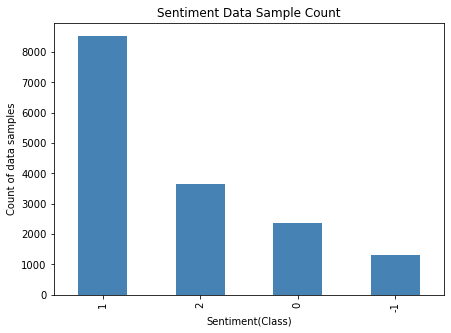

In [72]:
# Plotting sentiment data sample count

plt.figure(figsize=(7,5))
df_train['sentiment'].value_counts().plot(kind = 'bar', title='Sentiment Data Sample Count', color='steelblue')
plt.xlabel('Sentiment(Class)')
plt.ylabel("Count of data samples")
plt.show()

<AxesSubplot:title={'center':'Distribution of sentiment'}, ylabel='sentiment'>

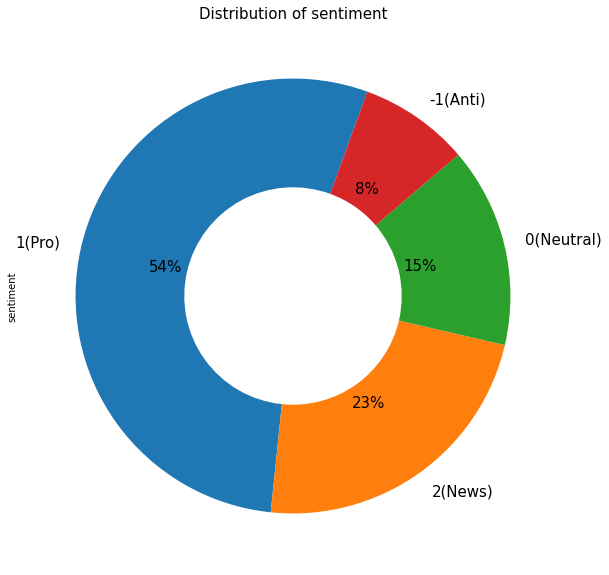

In [73]:
#plotting donut chart to see sentiment distribution

plt.figure(figsize=(10,10))
plt.title('Distribution of sentiment', fontsize=15)
plt.savefig("sentimentdonutchart.png")
df_train.sentiment.value_counts().plot(kind='pie', labels=['1(Pro)', '2(News)', '0(Neutral)', '-1(Anti)'],
                              wedgeprops=dict(width=.5), autopct='%1.0f%%', startangle= 70, 
                              textprops={'fontsize': 15})

As seen above on the donut chart, majority of the tweets in the dataset indicate users who are believe in man-made climate change while the minority of the tweets are anti man-made climate change. 

For the data preprocessing, two hypotheses can be tested and explored to aid with the data modelling:
- 1. Believers of man-made climate change tweet more about taking actions to fight the phenomenon and so one might find more words relating to positive action to be present in the tweets
- 2. Climate change deniers use the term global warming much often than believers and use aggressive language and words such as "fake", etc. 

<a id="three.2"></a>
### 3.2 Tweets Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


According to the [Twitter Help Center](https://help.twitter.com/en/using-twitter/retweet-faqs#:~:text=A%20Retweet%20is%20a%20re,re%2Dposting%20someone%20else's%20content): 

"A Retweet is a re-posting of a Tweet. Twitter's Retweet feature helps you and others quickly share that Tweet with all of your followers."

Following the hypotheses stated in the target variable analysis, one can add on the following regarding retweets (RT):
 
- People who are pro the belief of man-made climate change, are more likely to retweet more than others. Their retweets can consist of factual news, web-urls, or even other believers' views. 

To explore that hypothesis, below will be an analysis of the number of retweeted posted per sentiment. 

In [74]:
# Splitting the dataset according to sentiment

pro = df_train[df_train['sentiment'] == 1]
anti = df_train[df_train['sentiment'] == -1]
neutral = df_train[df_train['sentiment'] == 0]
news = df_train[df_train['sentiment'] == 2]

In [75]:
# pro rt search 

substring = 'RT'
pro_rt = pro[pro.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
anti_rt = anti[anti.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
neutral_rt = neutral[neutral.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
news_rt = news[news.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]


In [76]:
#combining the retweet data frames into one subdataframe

RT_data = pd.concat([pro_rt, anti_rt, neutral_rt, news_rt])
RT_data.shape

(10628, 3)

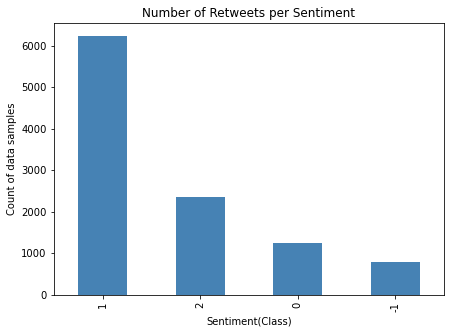

In [77]:
# Plotting sentiment data sample count

plt.figure(figsize=(7,5))
RT_data['sentiment'].value_counts().plot(kind = 'bar', title='Number of Retweets per Sentiment', color='steelblue')
plt.xlabel('Sentiment(Class)')
plt.ylabel("Count of data samples")
plt.show()

As suspected, sentiment class 1(Pro) has the highest number of retweets compared to all the other classes. 

Below, is a Word Cloud that shows the top 100 most common words for the Pro Sentiment Retweets.

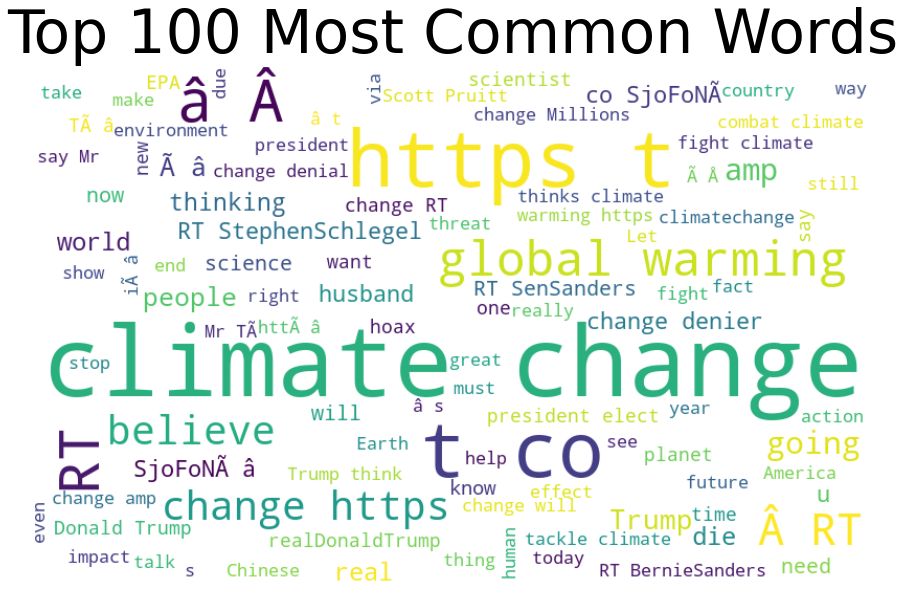

In [78]:
words = ' '.join([text for text in pro['message']])
wordcloud = WordCloud(width=800,  height=500, random_state=21, max_font_size=110,
                      max_words=100, background_color='white').generate(words)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=60)
plt.savefig("100commonwordsrawdata.png")
plt.show()


As one can see in the image above, "RT" forms part of the most common words in the dataset as expected. In addition to that, majority of these retweets consist of web-urls(links in the form 'https'), action-word filled tweets, and what seems to be political mentions. 

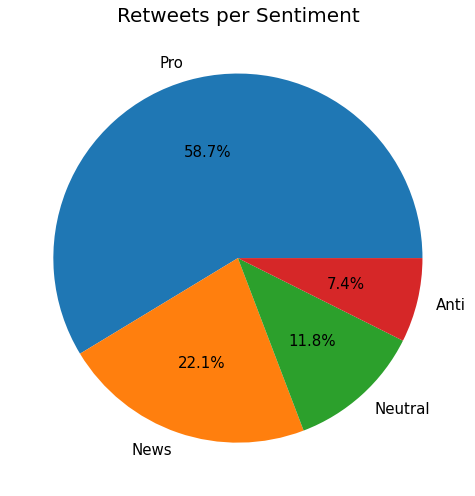

In [79]:
#Plotting pie chart to see distribution of retweets per sentiment

plt.figure(figsize = (7, 7))
plt.pie(RT_data.sentiment.value_counts().values, labels=['Pro', 'News', 'Neutral', 'Anti'], 
        autopct = '%2.1f%%', textprops={'fontsize': 15})
plt.title('Retweets per Sentiment', fontsize=20)
plt.tight_layout()
plt.show()

This analysis has proven the retweet hypothesis to be true and has shared insight on what steps to consider or what steps to leave out during the data cleaning stage. 



<a id="four"></a>
## 4. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

Before commencing with the data preprocessing, a copy of the dataset will be made as a safety precaution.

In [80]:
#Making a copy of both the train and test data

df = df_train.copy()
dft = df_test.copy()

<a id="four.1"></a>
### 4.1 Text Cleaning
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


In context of text analytics, removing noise is a vital part of getting the data into a usable format. For the train dataset, the following will be done:



*   removing '@'-mentions
*   removing the web-urls
*   making everything lower case
*   removing punctuation
*   removing digits and words containing digits
*   removing hashtags, emojis, and unknown characters

Once that is complete, the data will be ready for further analysis and text feature engineering.

#### 4.1.1 Removing '@' mentions

In [81]:
# Removing mentions

def remove_mentions(input_text, pattern):
    '''
    This function serves to remove any mentions denoted by 
    the @ symbol, followed by the twitter handle.
    '''
    r_find = re.findall(pattern, input_text)
    for word in r_find:
        input_text = re.sub(word, '',input_text)
    return input_text

In [82]:
df['message'] = np.vectorize(remove_mentions)(df['message'],'@[\w]*')
df[['message']].head()

,message
0,PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming an...
1,It's not like we lack evidence of anthropogenic global warming
2,RT : Researchers say we have three years to act on climate change before it’s too late...
3,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t....
4,"RT : It's 2016, and a racist, sexist, climate change denying bigot is leading in the p..."


#### 4.1.2 Removing web-urls

In [83]:
#removing web-urls

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


In [84]:
#removing remaining https

pattern_url = r'https?:\/\/.*\/\w*'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#### 4.1.3 Tweet cleaner function

In [85]:
def tweet_cleaner(tweet):
    
    """
    This function is necessary to remove punctuation, hashtags, 
    numbers and any extra white space from tweets after converting 
    everything to lowercase letters.
    
    """
    # Convert everything to lowercase
    tweet = tweet.lower() 
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove whitespace in front of tweet
    tweet = tweet.lstrip(' ')   
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
                          
    
    return tweet


In [86]:
df['message'] = df['message'].apply(tweet_cleaner)
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming an...,625221
1,1,it s not like we lack evidence of anthropogenic global warming,126103
2,2,rt researchers say we have three years to act on climate change before it’s too late …,698562
3,1,todayinmaker wired was a pivotal year in the war on climate change,573736
4,1,rt it s and a racist sexist climate change denying bigot is leading in the polls elect...,466954


#### 4.1.4 Replacing "rt" with "retweet

In [87]:
pattern_url = r'rt\s'
subs_url = r'retweet '
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesn t think carbon dioxide is main cause of global warming an...,625221
1,1,it s not like we lack evidence of anthropogenic global warming,126103
2,2,retweet researchers say we have three years to act on climate change before it’s too l...,698562
3,1,todayinmaker wired was a pivotal year in the war on climate change,573736
4,1,retweet it s and a racist sexist climate change denying bigot is leading in the polls ...,466954


#### 4.1.5 Removing emojis

In [88]:
def remove_emojis(string):
    
    """"
    This function serves to remove emojis from the 
    tweets in the data.
    
    """
    
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', string)


In [89]:
df['message'] = df['message'].apply(remove_emojis)

#### 4.1.6 Removing unknown characters

In [90]:
#removing the uknown charecters from words

pattern_url = r'[^A-Za-z ]'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

<a id="four.2"></a>
### 4.2 Stopwords Removal
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document.

Generally, the most common words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.

For this classification task, removing stopwords will help so that more focus can be given to those words which define the meaning of the text. Some stop words give context to the meaning of the word that follows. In this case, instead of removing all words, a list of stopwords wished to be removed will be defined and to be used in a function to remove stopwords. 

In [91]:
#Defining the list of stopword wished to be removed. 

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'but', 'by', 'can', 'd', 'did',
             'does', 'doesn', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'shan', "shan't", 'she', "shes", 'should', 'shouldve','so', 'some', 'such',
             't', 'than', 'that', 'thatll', 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'wa', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'with', 'won', 'y', 'you', 'youd','youll', 'youre',
             'you', 've', 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


In [92]:
df['message'] = df['message'].apply(lambda text: cleaning_stopwords(text))
df[['message']].head()

,message
0,polyscimajor epa chief think carbon dioxide main cause global warming wait via
1,not like lack evidence anthropogenic global warming
2,retweet researchers say three years act climate change late
3,todayinmaker wired pivotal year war climate change
4,retweet racist sexist climate change denying bigot leading polls electionnight


<a id="four.3"></a>
### 4.3 Text Normalization
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


#### 4.3.1 Tokenisation

Tokenization is a simple process that takes raw data and converts it into a useful data string. Tokenization is used in Natural Language Processing to split paragraphs and sentences into smaller units (i.e, tokens) that can be more easily assigned meaning.



In [93]:
#Creating tokenised column

tokeniser = TreebankWordTokenizer()
df['token'] = df['message'].apply(tokeniser.tokenize)

In [94]:
df.head()

,sentiment,message,tweetid,token
0,1,polyscimajor epa chief think carbon dioxide main cause global warming wait via,625221,"[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, wait,..."
1,1,not like lack evidence anthropogenic global warming,126103,"[not, like, lack, evidence, anthropogenic, global, warming]"
2,2,retweet researchers say three years act climate change late,698562,"[retweet, researchers, say, three, years, act, climate, change, late]"
3,1,todayinmaker wired pivotal year war climate change,573736,"[todayinmaker, wired, pivotal, year, war, climate, change]"
4,1,retweet racist sexist climate change denying bigot leading polls electionnight,466954,"[retweet, racist, sexist, climate, change, denying, bigot, leading, polls, electionnight]"


#### 4.3.2 Lemmatization

Lemmatization is an organized & step-by-step procedure of obtaining the root form of the word. It makes use of vocabulary (dictionary importance of words) and morphological analysis (word structure and grammar relations).

To make the text in the dataset understandable for the machine, lemmatization needs to be performed.

In [95]:
lemmatizer = WordNetLemmatizer()

def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [96]:
df['lemma'] = df['token'].apply(df_lemma, args=(lemmatizer, ))

In [97]:
df.tail()

,sentiment,message,tweetid,token,lemma
15814,1,retweet took material global warming lgbt rights health care hocking melania qvc https,22001,"[retweet, took, material, global, warming, lgbt, rights, health, care, hocking, melani...","[retweet, took, material, global, warming, lgbt, right, health, care, hocking, melania..."
15815,2,retweet climate change could breaking millionyearold relationship,17856,"[retweet, climate, change, could, breaking, millionyearold, relationship]","[retweet, climate, change, could, breaking, millionyearold, relationship]"
15816,0,notiven retweet nytimesworld trump actually believe climate change rick perry joins aides,384248,"[notiven, retweet, nytimesworld, trump, actually, believe, climate, change, rick, perr...","[notiven, retweet, nytimesworld, trump, actually, believe, climate, change, rick, perr..."
15817,-1,retweet hey liberals climate change crap hoax ties agenda climate changed,819732,"[retweet, hey, liberals, climate, change, crap, hoax, ties, agenda, climate, changed]","[retweet, hey, liberal, climate, change, crap, hoax, tie, agenda, climate, changed]"
15818,0,retweet climate change equation screenshots,806319,"[retweet, climate, change, equation, screenshots]","[retweet, climate, change, equation, screenshots]"


Now that the data has been cleaned, a new column consisting of the lemmmatized words in string datatype will be created and used going forward in this report. 

In [98]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemma']]
df.head()

,sentiment,message,tweetid,token,lemma,lemma_str
0,1,polyscimajor epa chief think carbon dioxide main cause global warming wait via,625221,"[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, wait,...","[polyscimajor, epa, chief, think, carbon, dioxide, main, cause, global, warming, wait,...",polyscimajor epa chief think carbon dioxide main cause global warming wait via
1,1,not like lack evidence anthropogenic global warming,126103,"[not, like, lack, evidence, anthropogenic, global, warming]","[not, like, lack, evidence, anthropogenic, global, warming]",not like lack evidence anthropogenic global warming
2,2,retweet researchers say three years act climate change late,698562,"[retweet, researchers, say, three, years, act, climate, change, late]","[retweet, researcher, say, three, year, act, climate, change, late]",retweet researcher say three year act climate change late
3,1,todayinmaker wired pivotal year war climate change,573736,"[todayinmaker, wired, pivotal, year, war, climate, change]","[todayinmaker, wired, pivotal, year, war, climate, change]",todayinmaker wired pivotal year war climate change
4,1,retweet racist sexist climate change denying bigot leading polls electionnight,466954,"[retweet, racist, sexist, climate, change, denying, bigot, leading, polls, electionnight]","[retweet, racist, sexist, climate, change, denying, bigot, leading, poll, electionnight]",retweet racist sexist climate change denying bigot leading poll electionnight


<a id="four.4"></a>
### 4.4 Clean Data Analysis
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


Now that the data has been cleaned, one can get a clear idea of common words in the dataset via the WordCloud tool. 

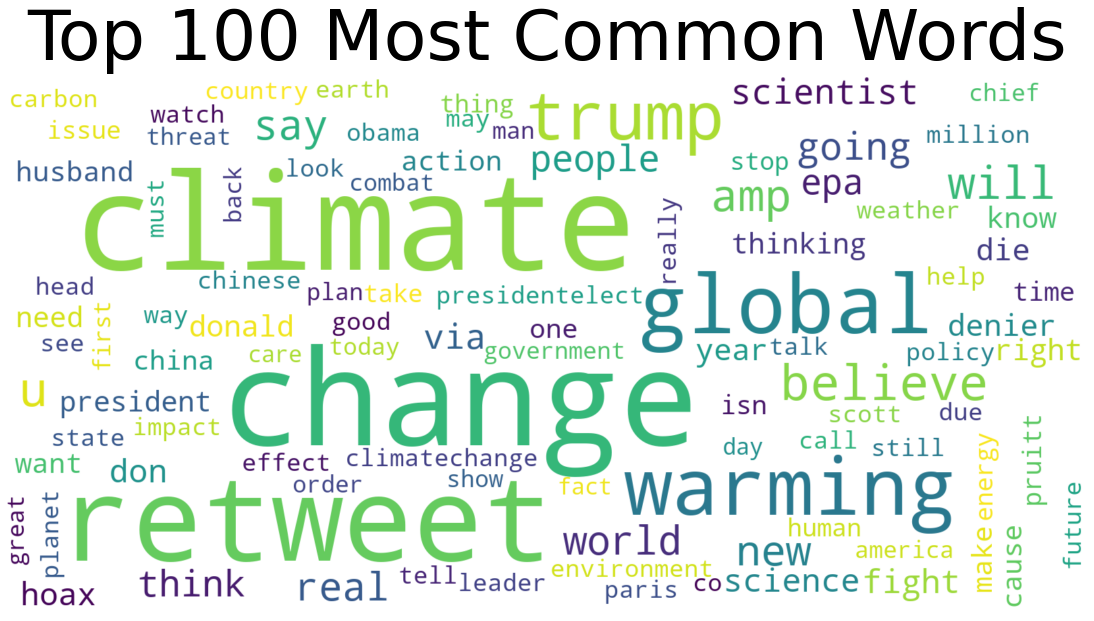

In [99]:
df_words = pd.Series(df['lemma_str']).str.cat(sep=' ') 

wordcloud = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(df_words)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words', fontsize=70)
plt.tight_layout(pad=0)
plt.savefig("Top100commonWords.png")
plt.show()

From the WordCloud above, it is evident that majority of the tweets:

- are retweets
- consist of action words
- climate change is also referred to as global warming
- consist of mentions of political figures such as Trump and Obama

<a id="five"></a>
## 5. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


<a id="five.1"></a>
### 5.1 Vectorization
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


NLTK's CountVectorizer can be used to clean text data and extract features, transforming the text data into a matrix of numbers that can be fed into a machine learning model.

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

For this notebook, the top 25 words that appear most often will be used, to make the model easier to train.

In [101]:
vect_25 = CountVectorizer(lowercase=True, max_features=25, analyzer='word', ngram_range=(1, 3))
X_count = vect_25.fit_transform(df['lemma_str'].values.astype(str))

In [102]:
# Let us see feature names
vect_25.get_feature_names()

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['amp',
 'believe',
 'believe climate',
 'believe climate change',
 'change',
 'climate',
 'climate change',
 'do',
 'epa',
 'global',
 'global warming',
 'going',
 'http',
 'not',
 'people',
 'real',
 'retweet',
 'say',
 'scientist',
 'think',
 'trump',
 'via',
 'warming',
 'will',
 'world']

In [103]:
# Get shape of our new predictor variables
X_count.shape

(15819, 25)

In [104]:
X = X_count.toarray()

In [105]:
X = pd.DataFrame(X, columns= vect_25.get_feature_names())

In [106]:
X.head()

,amp,believe,believe climate,believe climate change,change,climate,climate change,do,epa,global,...,real,retweet,say,scientist,think,trump,via,warming,will,world
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit label encoder and return encoded labels
y = df[['sentiment']]


In [108]:
y

,sentiment
0,1
1,1
2,2
3,1
4,1
...,...
15814,1
15815,2
15816,0
15817,-1


In [109]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

<a id="five.2"></a>
### 5.2 Dealing with Class Imbalance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---


As seen in the exploratory, the dataset classes are imbalanced. Imbalance data can hamper the models' accuracy big. In order to tackle this issue, the dataset has to be resampled. In order to do this, resampling techniques will be used.  

In [110]:
# Separate sentiment into classes 
Neutral = df[df['sentiment']==0]
Pro = df[df['sentiment']==1]
Anti = df[df['sentiment']==-1]
News = df[df['sentiment']==2]

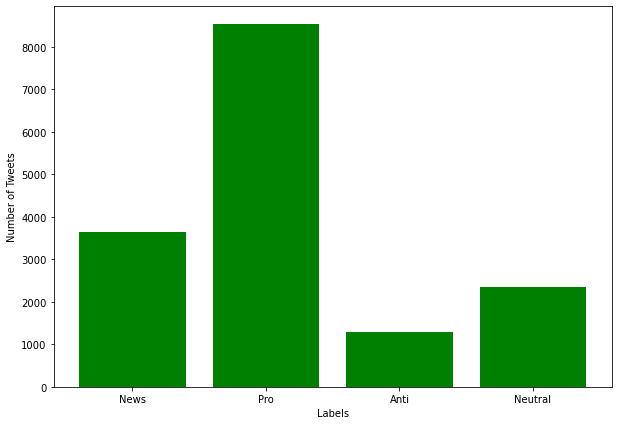

In [111]:
# Get all possible labels
labels = df['sentiment'].unique()
heights = [len(Anti),len(Neutral), len(Pro), len(News)]
plt.figure(figsize=(10,7))
plt.bar(labels,heights,color='green')
plt.xticks(labels,['Anti','Neutral','Pro','News'])
plt.xlabel('Labels')
plt.ylabel("Number of Tweets")
plt.savefig("Sentiment.png")
plt.show()

#### ***Upsampling***

Here, random copies of observations in the minority class are made until the size of the majority class is matched. Using this approach means more randomized data is added onto the original dataset.

In [112]:
# upsample 
News_upsampled = resample(News,
                          replace=True, # sample without replacement (no need to duplicate observations)
                          n_samples=len(Pro), # match number in minority class
                          random_state=50) # reproducible results

# upsample Neutral  classe
Neutral_upsampled = resample(Neutral,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= len(Pro), # match number in class_size
                          random_state=50) # reproducible results

# upsample Denier  classe
Denier_upsampled = resample(Anti,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= len(Pro), # match number in class_size
                          random_state=50) # reproducible results

# upsample Believer  classe
Believer_upsampled = resample(Pro,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= len(Pro), # match number in class_size
                          random_state=50) # reproducible results


# Combine upsampled classes
upsampled = pd.concat([News_upsampled, Neutral_upsampled, Denier_upsampled, Believer_upsampled])

In [113]:
print(upsampled['sentiment'].value_counts())
print(upsampled['sentiment'].value_counts() / len(df))

 2    8530
 0    8530
-1    8530
 1    8530
Name: sentiment, dtype: int64
 2    0.539225
 0    0.539225
-1    0.539225
 1    0.539225
Name: sentiment, dtype: float64


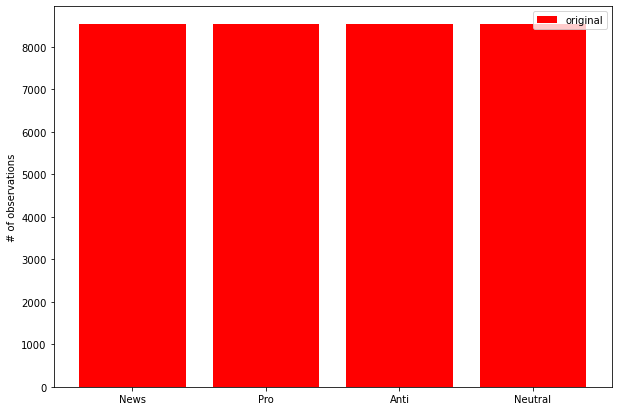

In [114]:
upsampled_heights = [len(upsampled[upsampled['sentiment']==0]), 
                     len(upsampled[upsampled['sentiment']==1]), 
                     len(upsampled[upsampled['sentiment']==-1]), 
                     len(upsampled[upsampled['sentiment']==2])]

# Get all possible labels
labels = df['sentiment'].unique()
plt.figure(figsize=(10,7))
#plt.bar(labels,heights,color='indigo')
plt.bar(labels,upsampled_heights,color='red')
plt.xticks(labels,['Anti','Neutral','Pro','News'])
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

<a id="six"></a>
## 6. Data Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


**Multi-label classification** refers to those classification tasks that have two or more class labels, where one or more class labels may be predicted for each example. This data has more than two classes thus, in order to get accurate results, multi-class classification algorithms will be used. 

In this section, we will train and predict the following popular algorithms that can be used for multi-class classification:

*   Logistic Regression
*   k-Nearest Neighbors
*   Support Vector Machine
*   Random Forest Classifier
*   Bernoulli Naive Bayes




In [115]:
y_up =  upsampled['sentiment']
X_up =  upsampled['lemma_str']

In [116]:
# create a scaler object
scaler = preprocessing.MinMaxScaler()


In [117]:
# dividing X, y into train and test data
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.2, random_state = 50)

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_up_vect = vectorizer.fit_transform(X_train_up)
X_test_up_vect = vectorizer.transform(X_test_up)

# Scale data
scaler = preprocessing.MaxAbsScaler ()
X_train_up_scaled = scaler.fit_transform(X_train_up_vect)
X_test_up_scaled = scaler.transform(X_test_up_vect)


<a id="six.1"></a>
### 6.1 Training Models
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---



### 1. Logistic Regression

Logistic regression models a relationship between predictor variables and a categorical response variable. Logistic regression helps estimate a probability of falling into a certain level of the categorical response given a set of predictors.

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, log_loss

In [121]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train_up_vect,y_train_up)

LogisticRegression(multi_class='ovr')

In [122]:
y_pred = lr.predict(X_test_up_vect)

In [123]:
print('Classification Report Linear logistics')
print(classification_report(y_test_up, y_pred ))

Classification Report Linear logistics
              precision    recall  f1-score   support

          -1       0.90      0.94      0.92      1734
           0       0.85      0.86      0.86      1664
           1       0.86      0.74      0.80      1750
           2       0.83      0.91      0.87      1676

    accuracy                           0.86      6824
   macro avg       0.86      0.86      0.86      6824
weighted avg       0.86      0.86      0.86      6824



### 2. SVC - Support Vector Classifier

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The algorithm creates a line or a hyperplane which separates the data into classes.

In [124]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
model_svc = svc.fit(X_train_up_vect,y_train_up)
model_svc 

SVC()

In [125]:
y_pred2 = svc.predict(X_test_up_vect)

In [126]:
print("\n\nClassification Report Support Vector Machine:\n\n", classification_report(y_test_up, y_pred2))
log_confusion_matrix()



Classification Report Support Vector Machine:

               precision    recall  f1-score   support

          -1       0.99      0.99      0.99      1734
           0       0.95      0.97      0.96      1664
           1       0.95      0.92      0.94      1750
           2       0.95      0.96      0.95      1676

    accuracy                           0.96      6824
   macro avg       0.96      0.96      0.96      6824
weighted avg       0.96      0.96      0.96      6824



### 3. Random Forest Classifier

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

In [127]:
rf = RandomForestClassifier()

rf.fit(X_train_up_vect, y_train_up)
y_pred3 = rf.predict(X_test_up_vect)

In [128]:
print("\n\nClassification Report Random Forest Classifier:\n\n", classification_report(y_test_up, y_pred3))



Classification Report Random Forest Classifier:

               precision    recall  f1-score   support

          -1       0.99      1.00      0.99      1734
           0       0.94      0.97      0.96      1664
           1       0.95      0.87      0.91      1750
           2       0.92      0.96      0.94      1676

    accuracy                           0.95      6824
   macro avg       0.95      0.95      0.95      6824
weighted avg       0.95      0.95      0.95      6824



### 4. K Neighbors Classifier

K Neighbors Classifier works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression)

In [129]:
KNN = KNeighborsClassifier()
KNN_fit = KNN.fit(X_train_up_vect, y_train_up)

In [130]:
y_pred4 = KNN.predict(X_test_up_vect)

In [131]:
print("\n\nClassification Report K Neighbors Classifier:\n\n", classification_report(y_test_up, y_pred4))



Classification Report K Neighbors Classifier:

               precision    recall  f1-score   support

          -1       0.84      0.97      0.90      1734
           0       0.75      0.84      0.79      1664
           1       0.83      0.55      0.66      1750
           2       0.79      0.85      0.82      1676

    accuracy                           0.80      6824
   macro avg       0.80      0.80      0.79      6824
weighted avg       0.80      0.80      0.79      6824



### 5. Bernoulli Naive Bayes

Bernoulli Naive Bayes is a part of the Naive Bayes family. It is based on the Bernoulli Distribution and accepts only binary values, i.e., 0 or 1. If the features of the dataset are binary, then we can assume that Bernoulli Naive Bayes is the algorithm to be used.

In [132]:
BNBmodel = BernoulliNB()
BNBmodel_fit = BNBmodel.fit(X_train_up_vect, y_train_up)

In [133]:
y_pred5 = BNBmodel.predict(X_test_up_vect)

In [134]:
print("\n\nClassification Report Bernoulli Naive Bayes:\n\n", classification_report(y_test_up, y_pred5))



Classification Report Bernoulli Naive Bayes:

               precision    recall  f1-score   support

          -1       0.87      0.88      0.87      1734
           0       0.80      0.77      0.79      1664
           1       0.78      0.71      0.74      1750
           2       0.79      0.89      0.84      1676

    accuracy                           0.81      6824
   macro avg       0.81      0.81      0.81      6824
weighted avg       0.81      0.81      0.81      6824



<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


It is evident from the classification report scores above that the Linear SVC model is the best performing. Not only does it have the highest overall F1 score, it also has the highest precision. 

The poorest performing model is the K-Neighbors Classifier, with the lowest F1 score of 0.80

<a id="eight"></a>
## 8. Submission
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

For the competition submission and pickling the chosen model for deployment, the data cleaning steps will be repeated on the test data before completing any submissions or pickling. 

<a id="eight.1"></a>
### 8.1 Cleaning Test Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [137]:
# Removing mentions

def remove_mentions(input_text, pattern):
    '''
    This function serves to remove any mentions denoted by 
    the @ symbol, followed by the twitter handle.
    '''
    r_find = re.findall(pattern, input_text)
    for word in r_find:
        input_text = re.sub(word, '',input_text)
    return input_text

In [138]:
dft['message'] = np.vectorize(remove_mentions)(dft['message'],'@[\w]*')
dft[['message']].head()

,message
0,Europe will now be looking to China to make sure that it is not alone in fighting clim...
1,Combine this with the polling of staffers re climate change and womens' rights and you...
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yA..."
3,\nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nT...
4,RT : 'Female orgasms cause global warming!'\n-Sarcastic Republican


In [139]:
#removing web-urls

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r''
dft['message'] = dft['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#removing remaining https

pattern_url = r'https?:\/\/.*\/\w*'
subs_url = r''
dft['message'] = dft['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [140]:
def tweet_cleaner(tweet):
    
    """
    This function is necessary to remove punctuation, hashtags, 
    numbers and any extra white space from tweets after converting 
    everything to lowercase letters.
    
    """
    # Convert everything to lowercase
    tweet = tweet.lower() 
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove whitespace in front of tweet
    tweet = tweet.lstrip(' ')   
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
                          
    
    return tweet


In [141]:
dft['message'] = dft['message'].apply(tweet_cleaner)
dft.head()

,message,tweetid
0,europe will now be looking to china to make sure that it is not alone in fighting clim...,169760
1,combine this with the polling of staffers re climate change and womens rights and you ...,35326
2,the scary unimpeachable evidence that climate change is already here itstimetochange c...,224985
3,\nputin got to you too jill trump doesn t believe in climate change at all thinks it s...,476263
4,rt female orgasms cause global warming -sarcastic republican,872928


In [142]:
pattern_url = r'rt\s'
subs_url = r''
dft['message'] = dft['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)
dft.head()

,message,tweetid
0,europe will now be looking to china to make sure that it is not alone in fighting clim...,169760
1,combine this with the polling of staffers re climate change and womens rights and you ...,35326
2,the scary unimpeachable evidence that climate change is already here itstimetochange c...,224985
3,\nputin got to you too jill trump doesn t believe in climate change at all thinks it s...,476263
4,female orgasms cause global warming -sarcastic republican,872928


In [143]:
def remove_emojis(string):
    
    """"
    This function serves to remove emojis from the 
    tweets in the data.
    
    """
    
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', string)


In [144]:
dft['message'] = dft['message'].apply(remove_emojis)

In [145]:
#removing the uknown charecters from words

pattern_url = r'[^A-Za-z ]'
subs_url = r''
dft['message'] = dft['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [146]:
#Defining the list of stopword wished to be removed. 

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'but', 'by', 'can', 'd', 'did',
             'does', 'doesn', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'shan', "shan't", 'she', "shes", 'should', 'shouldve','so', 'some', 'such',
             't', 'than', 'that', 'thatll', 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'wa', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'with', 'won', 'y', 'you', 'youd','youll', 'youre',
             'you', 've', 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


In [147]:
dft['message'] = dft['message'].apply(lambda text: cleaning_stopwords(text))
dft[['message']].head()

,message
0,europe will looking china make sure not alone fighting climate change
1,combine polling staffers climate change womens rights fascist state
2,scary unimpeachable evidence climate change already itstimetochange climatechange
3,putin got jill trump believe climate change thinks hoax
4,female orgasms cause global warming sarcastic republican


In [148]:
#Creating tokenised column

tokeniser = TreebankWordTokenizer()
dft['message'] = dft['message'].apply(tokeniser.tokenize)


In [149]:
dft.head()

,message,tweetid
0,"[europe, will, looking, china, make, sure, not, alone, fighting, climate, change]",169760
1,"[combine, polling, staffers, climate, change, womens, rights, fascist, state]",35326
2,"[scary, unimpeachable, evidence, climate, change, already, itstimetochange, climatecha...",224985
3,"[putin, got, jill, trump, believe, climate, change, thinks, hoax]",476263
4,"[female, orgasms, cause, global, warming, sarcastic, republican]",872928


In [150]:
#lemmatizer

lemmatizer = WordNetLemmatizer()

def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [151]:
dft['message'] = dft['message'].apply(df_lemma, args=(lemmatizer, ))
dft.head()

,message,tweetid
0,"[europe, will, looking, china, make, sure, not, alone, fighting, climate, change]",169760
1,"[combine, polling, staffer, climate, change, woman, right, fascist, state]",35326
2,"[scary, unimpeachable, evidence, climate, change, already, itstimetochange, climatecha...",224985
3,"[putin, got, jill, trump, believe, climate, change, think, hoax]",476263
4,"[female, orgasm, cause, global, warming, sarcastic, republican]",872928


In [152]:
dft['message'] = [' '.join(map(str,l)) for l in dft['message']]

<a id="eight.2"></a>
### 8.2 Model Submission
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

In [153]:
# Traing the model with the entire data
yf = upsampled['sentiment']
Xf = upsampled['lemma_str']

In [154]:
X_testf = dft['message']

In [155]:
# extracting features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(ngram_range = (1,3))
V_train_Xf = vectorizer2.fit_transform(Xf)
V_test_Xf = vectorizer2.transform(X_testf)

# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

# Scale data
X_Train_f = scaler.fit_transform(V_train_Xf)
X_Test_f = scaler.transform(V_test_Xf)


In [156]:
V_test_Xf.shape

(10546, 141773)

In [157]:
svm_model_linear_f = SVC(kernel='rbf').fit(V_train_Xf,yf)
final_preds = svm_model_linear_f.predict(V_test_Xf)

In [158]:
import pickle
with open('vectorizer_JM2.pkl', 'wb') as fin:
    pickle.dump(vectorizer2, fin)

In [159]:
# save the model to disk
model_name = ['SVC_linear']
models = [svm_model_linear_f]
for i in range(len(models)):
        filename = model_name[i] + '_Final_NM.pkl'
        pickle.dump(models[i], open(filename, 'wb'))


In [160]:
preds = [final_preds]
preds[0]

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [161]:
def submissions(preds): 
    
    
    model = ['SVC_linear']
    
    for i in range(len(model)):
        daf = pd.DataFrame(preds[i], columns=['sentiment'])
        output = pd.DataFrame({"tweetid":dft['tweetid']})
        final = output.join(daf)
        final_name = model[i] +"_Final_SVC.csv"
        final.to_csv(final_name, index=False)
        

    return final

In [162]:
df_sub = submissions(preds)
df_sub

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,0
10544,867455,0


In [164]:
experiment.display()

<a id="nine"></a>
## 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

From the sentiment analysis and model performance, it is safe to conclude that less is more. Selecting words that will yield great predicitons proves to be the better option as compared to just training the model with the entire data as is. 

<a id="ten"></a>
## 10. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

The notebook authors used the various sources below:

- https://medium.com/analytics-vidhya/twitter-sentiment-analysis-134553698978

- https://www.pewresearch.org/fact-tank/2019/04/18/a-look-at-how-people-around-the-world-view-climate-change/

- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9491544

